#US Accidents Exploratory Data Analysis
Information about data:
  Source- Kaggle
  Contains Information about Accidents   in USA
  Useful to prevent accidents



### Download Data


In [127]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt



In [128]:
import io
df = pd.read_csv('/content/US_Accidents_Dec20_updated.csv')

###Data Preparation and Cleaning
-Load file using pandas
-look at some information about the data & the column
-fix any missing or incoreect values


In [129]:
df.shape

(1516064, 47)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [131]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [132]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

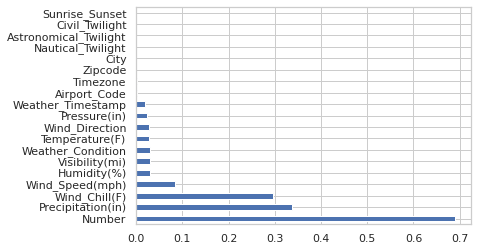

In [133]:

miss_percent=df.isna().sum().sort_values(ascending=False)/len(df)
miss_percent[miss_percent != 0].plot(kind='barh')


Remove columns that you don't want to use

In [134]:
df.drop('Precipitation(in)',axis=1,inplace=True)

In [135]:
df.drop('Wind_Chill(F)',axis=1,inplace=True)

In [136]:
df.drop('Number',axis=1,inplace=True)

## Exploratory Analysis and visualization
###Columns we will analyze#
1. City
2. Start Time
3. Start Lat, Start Long
4. Temperature
5. Weather Condition


### Which 20 cities have most number of accidents?

In [138]:
cities=df.City.unique()
len(cities)

10658

In [139]:
cities_by_accident=df.City.value_counts()
cities_by_accident.head(20)


Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

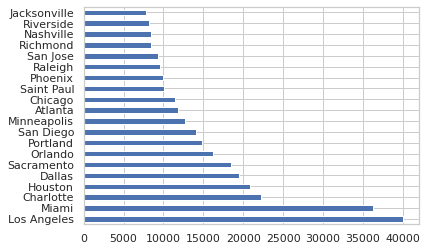

In [140]:
cities_by_accident[:20].plot(kind='barh')

In [142]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


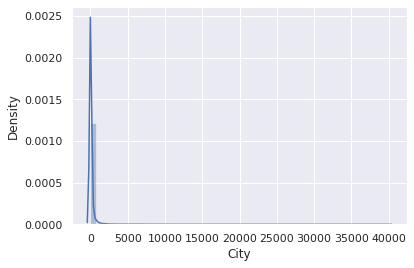

In [143]:
sns.distplot(cities_by_accident)

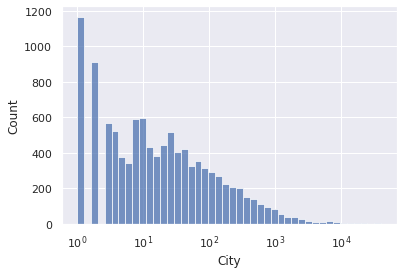

In [144]:
sns.histplot(cities_by_accident,log_scale=True)

In [145]:
cities_by_accident[cities_by_accident==1]

Walnut Hills     1
Hotevilla        1
Stockett         1
Dacono           1
Roxie            1
                ..
Curtiss          1
Slade            1
White River      1
Heber Springs    1
Tiverton         1
Name: City, Length: 1167, dtype: int64

In [146]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [147]:
len(high_accident_cities)/len(cities)

0.023550384687558643

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


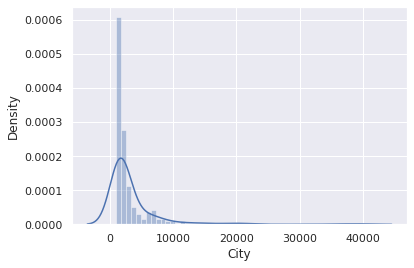

In [148]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


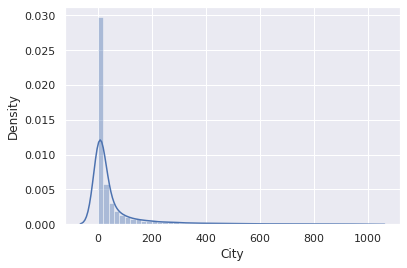

In [149]:
sns.distplot(low_accident_cities)

###Start Time

In [150]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [151]:
df.Start_Time=pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


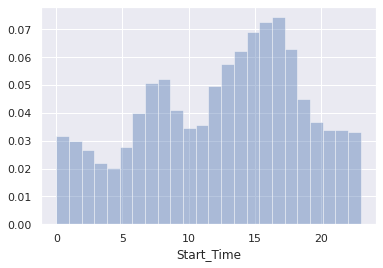

In [152]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False, norm_hist=True)

- high perecentage of accidents occur between 3 PM -6 PM(probabaly because traffic is higher beacause people go to home from work.)
- Another time slot is 6 AM- 9 AM(probabaly because people leave for work in hurry)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


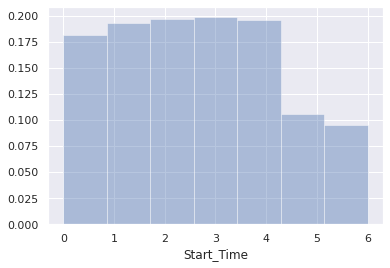

In [153]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False, norm_hist=True)

- On weekends, the number of accident is lower compare with weekdays.

Is the distribution by hour the same on weekends as on weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


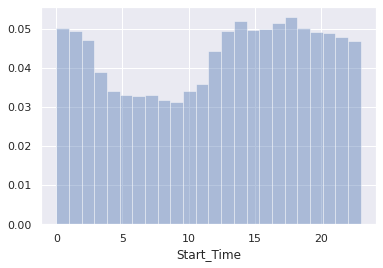

In [154]:
weekend_start_time=df.Start_Time[df.Start_Time.dt.dayofweek.isin(['5','6'])]
sns.distplot(weekend_start_time.dt.hour,bins=24,kde=False, norm_hist=True)

- On weekends, the peak occurs of accident is from after noon to late night.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


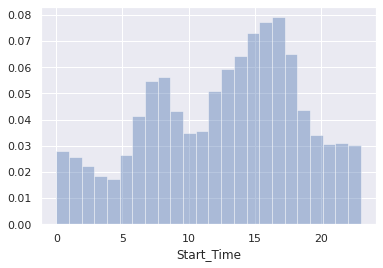

In [155]:
weekday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek.isin(['0','1','2','3','4'])]
sns.distplot(weekday_start_time.dt.hour,bins=24,kde=False, norm_hist=True)

- On weekdays, the peak of accidents is in the evening between 4 PM to 6 Pm and in the morning between 6 AM to 9 AM.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


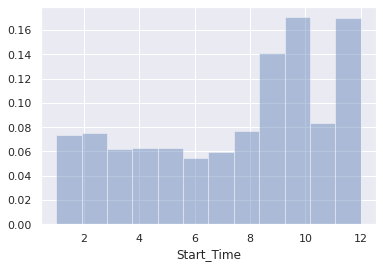

In [156]:
df_2019=df[df.Start_Time.dt.year ==2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


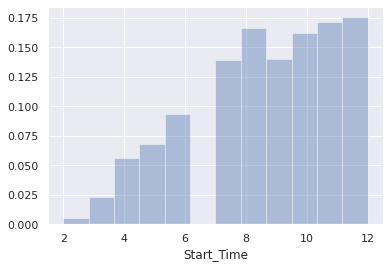

In [157]:
df_2016=df[df.Start_Time.dt.year ==2016]
sns.distplot(df_2016.Start_Time.dt.month,bins=12,kde=False, norm_hist=True)

- For the month data, much data is missing for 2016, maybe even for 2017. 

###Start Latitude and Longitude


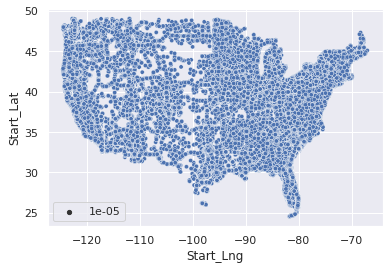

In [158]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.00001)

In [159]:
import folium
from folium.plugins import HeatMap

In [160]:
sample_df=df.sample(int(0.001*len(df)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [161]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map


In [162]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.473031e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,5.958460e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,1.827316e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,4.700000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,6.100000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,7.300000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.706000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02


###Are there more accidents is warmer or colder areas?

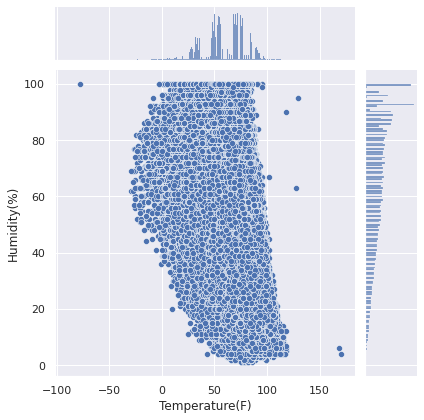

In [163]:
sns.jointplot(x=df['Temperature(F)'], y=df['Humidity(%)'])

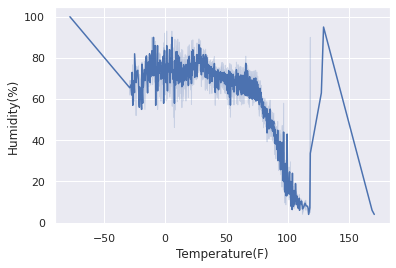

In [164]:
sns.lineplot(x=df['Temperature(F)'], y=df['Humidity(%)'])

From the above charts, We can say that there is relation between humidity and tempearture when accident occurs.
Most of the accidents occurs when Humidity is high and Teperature is low. This can be Winter season when it is snowing.
Other possible reason can be high temperature with low humidity.

### Which 5 States has highest number of accidents?

In [168]:
states=df.State.unique()
states_by_accident=df.State.value_counts()


In [177]:
top5_states=states_by_accident.head(5)
top5_states

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: State, dtype: int64

From above list, we can say that the most accidents occur in the highly populated states.

In [187]:
states_by_accident_per_capita=(df.State.value_counts()/len(df))*100
states_by_accident_per_capita.head(10)

CA    29.605149
FL    10.092384
OR     5.770469
TX     4.956387
NY     4.021862
MN     3.452691
VA     3.377034
NC     3.308501
PA     2.826002
IL     2.751137
Name: State, dtype: float64

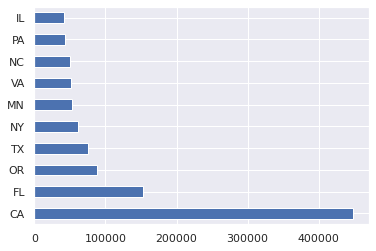

In [208]:
states_by_accident[:10].plot(kind='barh')

### Analysis for particulary 'New Jersey'

In [197]:
NJ_count=df.loc[df['State']=='NJ']
len(NJ_count)

29850

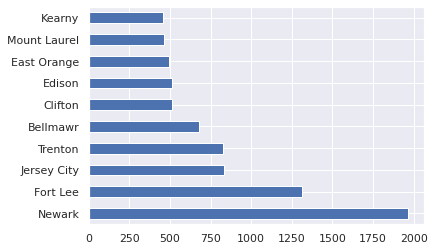

In [206]:
NJ_cities=NJ_count.City.value_counts()
NJ_cities[:10].plot(kind='barh')


## Summary and Conclusion
###Insights#
1. New York has less than 5000 accidents per year inspite of being the most populated city in USA.
2. There are more number of accidents around the coast. 
3. The number of accidents per city decreases exponentially. 
4. Less than 5% of cities have more than 1000 accidents.
5. Over 1200 cities have reported just 1 accident. (needs to be investigated)
6. Number of accidents are more when Humidity is high and Teperature is low and high temperature with low humidity.
7. Newark city has highest number of accidents in New Jersey State.